# Helper Methods

In [1]:
import numpy as np

# outlier removal method: IQR
# returns list without outliers
# http://colingorrie.github.io/outlier-detection.html
# https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
def remove_outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    cut_off = (iqr * 1.5)
    lower_bound = quartile_1 - cut_off
    upper_bound = quartile_3 + cut_off
    # identify outliers
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in data if x >= lower_bound and x <= upper_bound]
    print('Non-outlier observations: %d' % len(outliers_removed))
    return outliers_removed

# annotates plt with y values
def plot_annotate(plt,xvalues,yvalues):
    for i,j in zip(xvalues, yvalues):
        plt.annotate(str(np.round(j,1)),xy=(i-0.15,j))
    

# PyMongo Query

db = "test"
collection = "benchmarklogs"

In [2]:
from pymongo import MongoClient
client = MongoClient()

db = client['test']
collection = db['benchmarklogs']

# PyMongo Query ->Pandas DataFrame

In [3]:
import pandas as pd

query = {"$and":[ {"$or":[ {"usedGenesisJson":"genesis_pow_difficulty_1.json"},{"usedGenesisJson":"genesis_pow_difficulty_05.json"},{"usedGenesisJson":"genesis_pow_difficulty_025.json"},{"usedGenesisJson":"genesis_pow_difficulty_2.json"},{"usedGenesisJson":"genesis_pow_difficulty_4.json"} ]}, 
        {"maxTransactions": 1000}, {"instanceType":'c5.xlarge'}, {"nodes":5}, {"scenario":"account"}]}

# query = {}

# Make a query to the specific DB and Collection
cursor = collection.find(query)

# Expand the cursor and construct the DataFrame
df = pd.DataFrame(list(cursor))

#display(df.head(200))

sample_size = len(df.index)
print("Number of rows:" + str(sample_size))

Number of rows:350


# Pandas DataFrame -> Plot
## Throughput

In [4]:
import matplotlib.pyplot as plt

data_tps = df[['txPerSecond','usedGenesisJson']]

title_tps = "Throughput against Mining Difficulty (PoW, n=" + str(sample_size) + ")"
xlabel = "Mining Difficulty Factor"
ylabel = "Transactions Per Second (TPS)"

objects = list(["Factor 0.25","Factor 0.5","Factor 1","Factor 2","Factor 4"])
xvalues = [0.25,0.5,1,2,4]

## combine these different collections into a list    
data_to_plot_tps = [data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_025.json"].iloc[:,0],
                    data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_05.json"].iloc[:,0],
                    data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_1.json"].iloc[:,0],
                    data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_2.json"].iloc[:,0],
                    data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_4.json"].iloc[:,0]]

data1_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_025.json"].iloc[:,0]
data2_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_05.json"].iloc[:,0]
data3_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_1.json"].iloc[:,0]
data4_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_2.json"].iloc[:,0]
data5_tps = data_tps.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_4.json"].iloc[:,0]

# REMOVE OUTLIERS
#data1_tps = pd.Series(remove_outliers_iqr(data1_tps))
#data2_tps = pd.Series(remove_outliers_iqr(data2_tps))
#data3_tps = pd.Series(remove_outliers_iqr(data3_tps))
#data4_tps = pd.Series(remove_outliers_iqr(data4_tps))
#data5_tps = pd.Series(remove_outliers_iqr(data5_tps))

avg1_tps = data1_tps.mean()
avg2_tps = data2_tps.mean()
avg3_tps = data3_tps.mean()
avg4_tps = data4_tps.mean()
avg5_tps = data5_tps.mean()

means_tps = [avg1_tps, avg2_tps, avg3_tps, avg4_tps, avg5_tps]

print(avg1_tps)
print(avg2_tps)
print(avg3_tps)
print(avg4_tps)
print(avg5_tps)


73.00864059930355
73.93486600419659
70.41027514885735
61.18141189611884
47.313640501546196


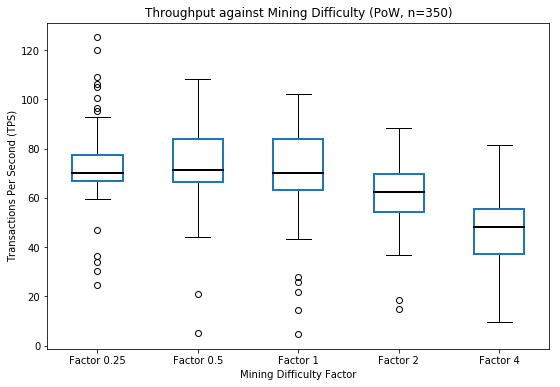

In [5]:
color_latency="#ff7f0e"
color_tps="#1f77b4"

fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title_tps)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot_tps,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_tps, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 

fig.savefig("result_difficulty_pow_throughput_boxplot.svg", format="svg")

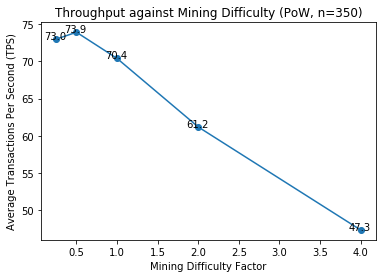

In [6]:
plt.plot(xvalues, means_tps, marker='o', color=color_tps)
plt.title(title_tps)
plt.ylabel("Average Transactions Per Second (TPS)")
plt.xlabel(xlabel)
plot_annotate(plt,xvalues, means_tps)
plt.savefig("result_difficulty_pow_throughput_lines_average.svg", format="svg")
plt.show()

## Latency

In [7]:
data_latency = df[['averageDelay','usedGenesisJson']]
#print(data_latency)

title_latency = "Latency against Mining Difficulty (PoW, n=" + str(sample_size) + ")"
xlabel = "Mining Difficulty Factor"
ylabel = "Transaction Latency [seconds]"

## combine these different collections into a list    
data_to_plot_latency = [data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_025.json"].iloc[:,0],
                        data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_05.json"].iloc[:,0],
                        data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_1.json"].iloc[:,0],
                        data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_2.json"].iloc[:,0],
                        data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_4.json"].iloc[:,0]]

avg1_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_025.json"].iloc[:,0].mean()
avg2_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_05.json"].iloc[:,0].mean()
avg3_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_1.json"].iloc[:,0].mean()
avg4_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_2.json"].iloc[:,0].mean()
avg5_latency = data_latency.loc[df['usedGenesisJson'] == "genesis_pow_difficulty_4.json"].iloc[:,0].mean()

means_latency = [avg1_latency, avg2_latency, avg3_latency, avg4_latency, avg5_latency]

print(avg1_latency)
print(avg2_latency)
print(avg3_latency)
print(avg4_latency)
print(avg5_latency)

7.884446828571429
7.719264561833001
9.129203517597858
10.104024099999998
13.227320301975384


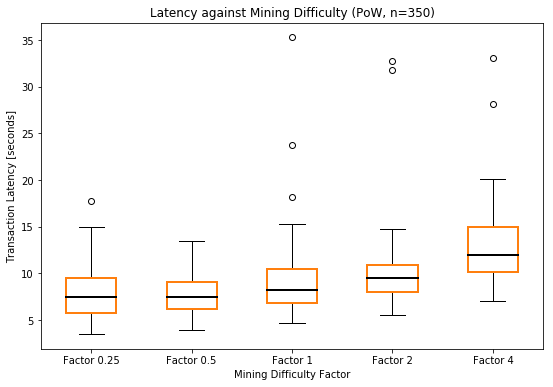

In [8]:
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

ax.set_title(title_latency)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

# Create the boxplot
bp = ax.boxplot(data_to_plot_latency,labels=objects, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color=color_latency, linewidth=2)
    # change fill color
    box.set( facecolor = 'w' )
    
## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color="k", linewidth=2) 
    
fig.savefig("result_difficulty_pow_latency_boxplot.svg", format="svg")

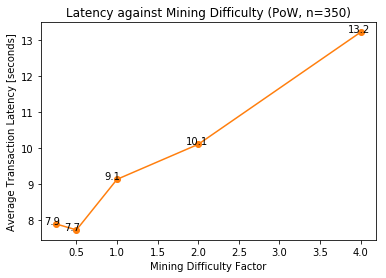

In [9]:
plt.plot(xvalues, means_latency, marker='o', color=color_latency)
plt.title(title_latency)
plt.ylabel("Average Transaction Latency [seconds]")
plt.xlabel(xlabel)
plot_annotate(plt,xvalues, means_latency)
plt.savefig("result_difficulty_pow_latency_lines_average.svg", format="svg")
plt.show()

## Throughput and Latency Combined

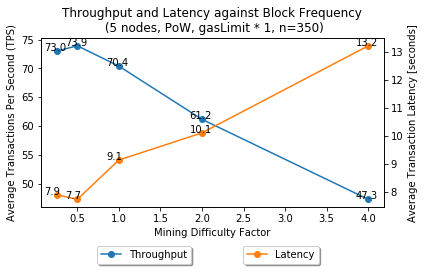

In [11]:
fig, ax1 = plt.subplots()
#fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.set_title("Throughput and Latency against Block Frequency\n (5 nodes, PoW, gasLimit * 1, n=" + str(sample_size) + ")")
ax1.set_xlabel(xlabel)

ax1.plot(xvalues, means_tps, marker='o', color=color_tps, label="Throughput")
ax1.set_ylabel("Average Transactions Per Second (TPS)")
#ax1.set_xticks([0.25,0.5,1,2,4])


plot_annotate(ax1,xvalues, means_tps)

ax2 = ax1.twinx()
ax2.plot(xvalues, means_latency, marker='o', color=color_latency,label="Latency")
ax2.set_ylabel("Average Transaction Latency [seconds]")
plot_annotate(ax2,xvalues, means_latency)

ax1.legend(loc='upper center', bbox_to_anchor=(0.3, -0.2),
          ncol=3, fancybox=True, shadow=True)

ax2.legend(loc='upper center', bbox_to_anchor=(0.7, -0.2),
          ncol=3, fancybox=True, shadow=True)

fig.tight_layout()
fig.savefig("result_difficulty_pow_combined_lines.svg", format="svg")
plt.show()